# IT3103 Practical 1: Artificial Neural Networks

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete PyTorch program with the details explained as you go.

This guide uses [PyTorch](https://pytorch.org/) with `torchvision` and `torch.utils.data` to build and train models.

## Objectives
Create a simple shallow feedforward neural network for the image classification application.

## Install and import the necessary libraries

In [97]:
!pip install torch torchvision tensorboard
!pip install matplotlib

In [98]:
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from torch.utils.tensorboard import SummaryWriter

import numpy as np
import matplotlib.pyplot as plt
import os

print(torch.__version__)

2.8.0+cpu


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>


Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST dataset directly from torchvision. Import and load the Fashion MNIST dataset directly from torchvision:

In [99]:
transform = transforms.ToTensor()

train_full = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_ds = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

print(len(train_full))
print(len(test_ds))


60000
10000


In [100]:
# Further split train into train and validation
train_ds, val_ds = random_split(train_full, [50000, 10000])
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

50000
10000
10000


Question: Why we need further split train set into train set and validation set?

Your ansers:

In [101]:
# Create data loaders
batch_size = 64
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=batch_size)
test_loader = DataLoader(test_ds, batch_size=batch_size)

Question: Why we need create data loaders?

Your answers:

## Explore the data



The images are 28x28 NumPy arrays, with original pixel values ranging from 0 to 255. Here, images are already scaled to [0,1] by transforms.ToTensor() when we load the Fashion MNIST dataset.

In [102]:
# confirm the range of the pixel values
img, lbl = train_ds[0]
print(img.shape)
print(img.min(), img.max())

torch.Size([1, 28, 28])
tensor(0.) tensor(0.9961)


The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [103]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [104]:
# view labels for the first 20 samples
print([train_ds[i][1] for i in range(20)])
print([class_names[train_ds[i][1]] for i in range(20)])

all_labels = [train_ds[i][1] for i in range(len(train_ds))] 
# confirm the range of labels
print(min(all_labels), max(all_labels))


[8, 2, 9, 2, 9, 6, 9, 0, 1, 1, 0, 1, 9, 8, 4, 8, 1, 6, 1, 3]
['Bag', 'Pullover', 'Ankle boot', 'Pullover', 'Ankle boot', 'Shirt', 'Ankle boot', 'T-shirt/top', 'Trouser', 'Trouser', 'T-shirt/top', 'Trouser', 'Ankle boot', 'Bag', 'Coat', 'Bag', 'Trouser', 'Shirt', 'Trouser', 'Dress']
0 9


**Exercise 1:**: explore the validation dataset by looking at:
* one sample in the validation dataset
* the dimesnion of an image in the validation dataset
* the labels for the first 20 samples from the validation dataset

In [105]:
# your code here:

**Exercise 2:** explore the test dataset by looking at:
* one sample in the validation dataset
* the dimesnion of an image in the validation dataset
* the labels for the first 20 samples from the validation dataset

In [106]:
# your code here:

## Visualize the data


Visualize the image using matplotlib with colorbar feature

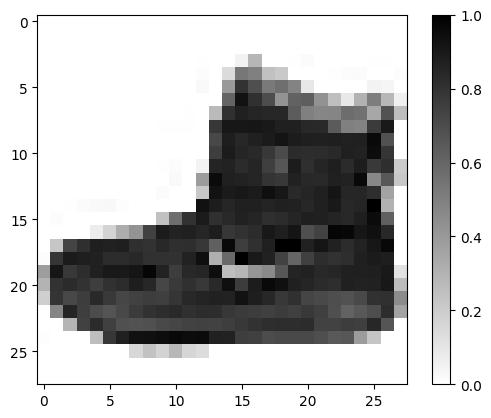

In [107]:
plt.figure()
img0 = train_full[0][0]
plt.imshow(img0.squeeze(), cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

let's display the first 25 images from the *training set* and display the class name below each image.

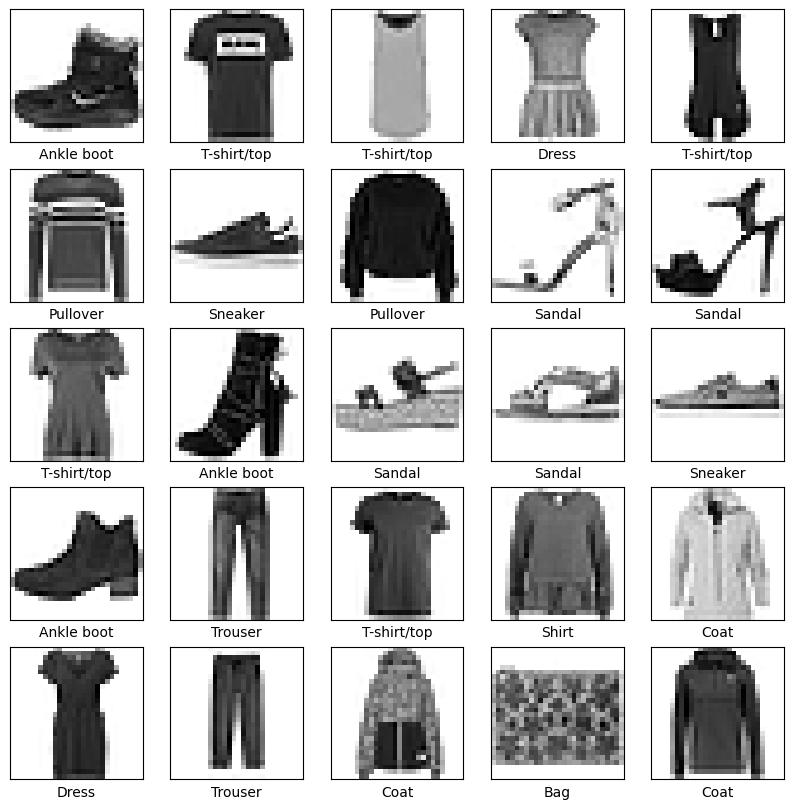

In [108]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img, lbl = train_full[i]
    plt.imshow(img.squeeze(), cmap=plt.cm.binary)
    plt.xlabel(class_names[lbl])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. For our simple model, we can use the Sequential model to chain multiple layers together.

Most layers, such as `torch.nn.Linear`, have parameters that are learned during training.

Using torch.nn API, we will construct a neural network that consists of the following:

- The first layer in this network, `torch.nn.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

- After the pixels are flattened, the network consists of a sequence of two dense layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons) using activation fuction Rectified Linear Unit (ReLU). The second (and last) layer returns a logits array with length of 10. Each node contains a probability score that indicates how likely is the current image belongs to one of the 10 classes. We will use a softmax function as the activation function for the second (and last) layer to ensure the probability adds up to 1.0.

- Use appropriate activation function for each layer

In [109]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.Flatten = nn.Flatten()
        self.Linear1 = nn.Linear(28*28, 128)
        self.ReLU = nn.ReLU()
        self.Linear2 = nn.Linear(128, 10)
        self.Softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.Flatten(x)
        x = self.Linear1(x)
        x = self.ReLU(x)
        x = self.Linear2(x)
        x = self.Softmax(x) 
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MLP().to(device)
print(model)


MLP(
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (Linear1): Linear(in_features=784, out_features=128, bias=True)
  (ReLU): ReLU()
  (Linear2): Linear(in_features=128, out_features=10, bias=True)
  (Softmax): Softmax(dim=1)
)


Deep dive into a PyTorch model - A close look at a PyTorch model using library torchinfo

In [110]:
!pip install torchinfo


In [111]:
from torchinfo import summary
summary(model, input_size=(64, 1, 28, 28))  # e.g. batch size = 64


Layer (type:depth-idx)                   Output Shape              Param #
MLP                                      [64, 10]                  --
├─Flatten: 1-1                           [64, 784]                 --
├─Linear: 1-2                            [64, 128]                 100,480
├─ReLU: 1-3                              [64, 128]                 --
├─Linear: 1-4                            [64, 10]                  1,290
├─Softmax: 1-5                           [64, 10]                  --
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 6.51
Input size (MB): 0.20
Forward/backward pass size (MB): 0.07
Params size (MB): 0.41
Estimated Total Size (MB): 0.68


### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function. In our case, we will just use Adam.
* *Metrics* —Used to monitor the training and testing steps. In our case, we want to monitor *accuracy*, the fraction of the images that are correctly classified.

In [112]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


To visualize the training progress, we use of the Tensorboard callback function tensorborad.SummaryWriter. 

In [113]:
# TensorBoard writer
root_logdir = os.path.join(os.curdir, "tb_logs")
os.makedirs(root_logdir, exist_ok=True)
from datetime import datetime
run_id = datetime.now().strftime("run_%Y_%m_%d-%H_%M_%S")
run_logdir = os.path.join(root_logdir, run_id)
writer = SummaryWriter(log_dir=run_logdir)


We define the evaluation function to calculate the value of loss and accuracy.

In [114]:
def evaluate(loader):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            logits = model(x)
            loss = criterion(logits, y)
            total_loss += loss.item() * x.size(0)
            preds = logits.argmax(dim=1)
            correct += (preds == y).sum().item()
            total += x.size(0)
    return total_loss / total, correct / total

### Train the model with 30 epochs.

In [115]:
epochs = 30

for epoch in range(1, epochs+1):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        logits = model(x)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * x.size(0)
        preds = logits.argmax(dim=1)
        correct += (preds == y).sum().item()
        total += x.size(0)
    train_loss = running_loss / total
    train_acc = correct / total
    val_loss, val_acc = evaluate(val_loader)
    writer.add_scalars('Loss', {'train': train_loss, 'val': val_loss}, epoch)
    writer.add_scalars('Accuracy', {'train': train_acc, 'val': val_acc}, epoch)
    print(f"Epoch {epoch:02d}: train_loss={train_loss:.4f} train_acc={train_acc:.4f} val_loss={val_loss:.4f} val_acc={val_acc:.4f}")

writer.flush()

Epoch 01: train_loss=1.7524 train_acc=0.7253 val_loss=1.6964 val_acc=0.7682
Epoch 02: train_loss=1.6815 train_acc=0.7839 val_loss=1.6795 val_acc=0.7846
Epoch 03: train_loss=1.6687 train_acc=0.7947 val_loss=1.6773 val_acc=0.7845
Epoch 04: train_loss=1.6635 train_acc=0.8004 val_loss=1.6748 val_acc=0.7878
Epoch 05: train_loss=1.6599 train_acc=0.8032 val_loss=1.6715 val_acc=0.7894
Epoch 06: train_loss=1.6566 train_acc=0.8059 val_loss=1.6652 val_acc=0.7974
Epoch 07: train_loss=1.6531 train_acc=0.8091 val_loss=1.6606 val_acc=0.8009


KeyboardInterrupt: 

In [116]:
%load_ext tensorboard
%tensorboard --logdir tb_logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 72072), started 4:59:26 ago. (Use '!kill 72072' to kill it.)

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.94 (or 94%) on the training data.

**Exercise 3:**

- What is the accuracy achieved by validation data?
- Is there any overfitting?

<details><summary>Click here for answer</summary>
The validation accuracy should be around 0.89. Yes, there is overfitting (0.94 vs 0.89)
</details>



### Evaluate accuracy on test dataset

Next, compare how the model performs on the test dataset:

In [117]:
test_loss, test_acc = evaluate(test_loader)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.7986


It turns out that the accuracy on the test dataset (and also validation dataset) is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

### Make predictions

With the model trained, you can use it to make predictions about some images.
The model's linear outputs, [logits](https://developers.google.com/machine-learning/glossary#logits). Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.

In [118]:
# Compute predictions on the whole test set
model.eval()
all_probs = []
all_imgs = []
all_labels = []
with torch.no_grad():
    for x, y in test_loader:
        x = x.to(device)
        logits = model(x)
        probs = torch.softmax(logits, dim=1).cpu().numpy()
        all_probs.append(probs)
        all_imgs.append(x.cpu().numpy())
        all_labels.append(y.numpy())

preds = np.concatenate(all_probs, axis=0)
# store numpy arrays for plotting below (match earlier variable names)
test_images = np.concatenate(all_imgs, axis=0)[:, 0, :, :]
test_labels = np.concatenate(all_labels, axis=0)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [119]:
print(preds[0])

[0.08548996 0.08548996 0.08548996 0.08548996 0.08548996 0.08617114
 0.08548996 0.08586901 0.08549044 0.22952983]


You will notice that the prediction is not a single label that tell you what is the clothing object. Instead you get an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value.


You can use [``np.argmax()``](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) to find the index of the probabilities with the maximum value (maximum confidence).

In [120]:
np.argmax(preds[0])

np.int64(9)

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [121]:
test_labels[0]

np.int64(9)

Here we define some utility function to help us plot the full set of 10 class predictions.

In [122]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

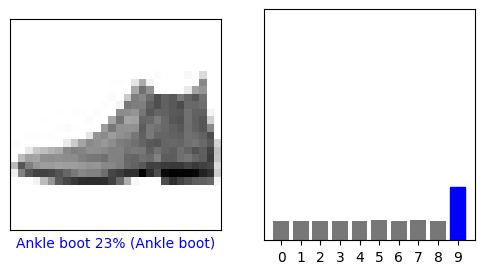

In [123]:
i = 0   # choose image 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, preds[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, preds[i],  test_labels)
plt.show()

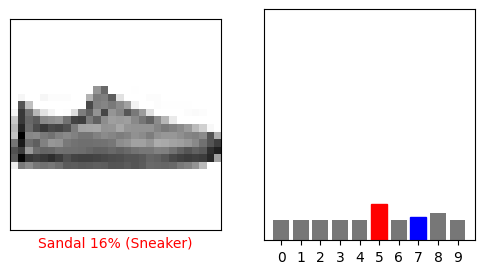

In [124]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, preds[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, preds[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

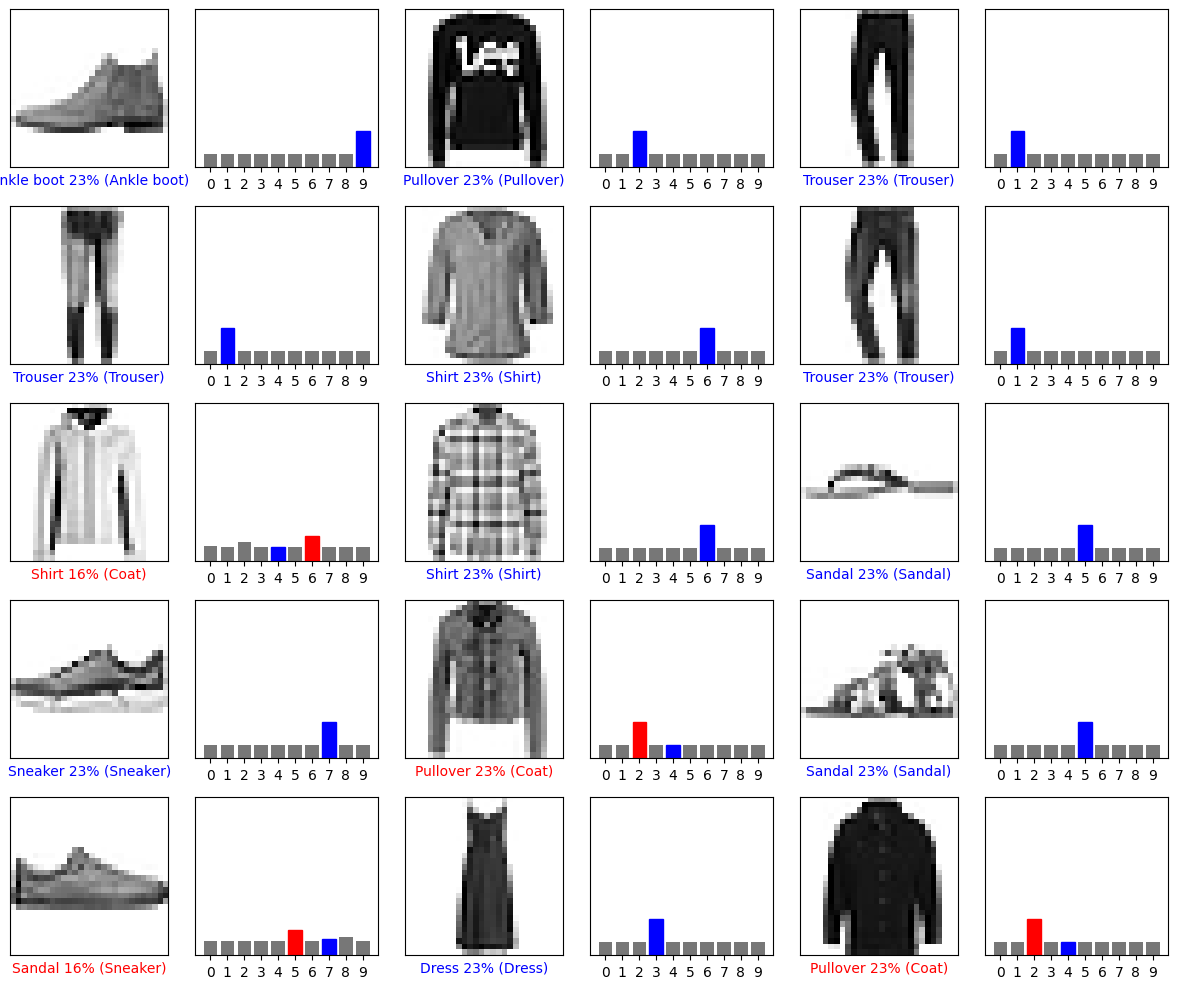

In [125]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, preds[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, preds[i], test_labels)
plt.tight_layout()
plt.show()

## Save the model

We will now save our model which can be used for inference later on. In this example we will use the SavedModel format, which includes the weights and the model definition.



In [126]:
torch.save(model.state_dict(), 'fmnist_model.pt')

## Using the trained model for inference

We will now use our saved model to to make a prediction about a single image.

We will need to first load our trained model from the SavedModel.


In [127]:
saved_model = MLP().to(device)
saved_model.load_state_dict(torch.load('fmnist_model.pt', map_location=device))
saved_model.eval()


MLP(
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (Linear1): Linear(in_features=784, out_features=128, bias=True)
  (ReLU): ReLU()
  (Linear2): Linear(in_features=128, out_features=10, bias=True)
  (Softmax): Softmax(dim=1)
)

In [128]:
# Grab an image from the test dataset (already normalized [0,1]).
img = test_images[1]

print(img.shape)

(28, 28)


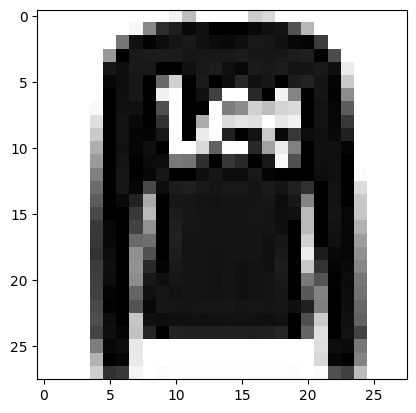

In [ ]:
plt.imshow(img, cmap=plt.cm.binary)

PyTorch models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [ ]:
# Add the image to a batch where it's the only member.
img_batch = img[None, None, :, :]  # shape (1,1,28,28)
img_batch = torch.from_numpy(img_batch).float().to(device)

print(img_batch.shape)

torch.Size([1, 1, 28, 28])


Now predict the correct label for this image:

In [ ]:
with torch.no_grad():
    logits = saved_model(img_batch)
    preds_single = torch.softmax(logits, dim=1).cpu().numpy()

print(preds_single)

[[0.08533674 0.08533674 0.23196931 0.08533674 0.08533674 0.08533674
  0.08533674 0.08533674 0.08533674 0.08533674]]


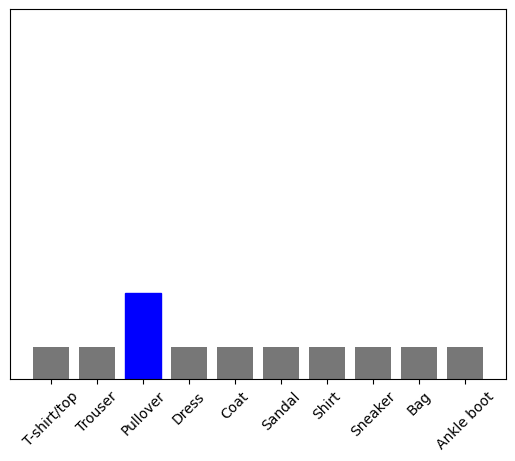

In [ ]:
plot_value_array(1, preds_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`logits = saved_model(img_batch)` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [ ]:
np.argmax(preds_single[0])

np.int64(2)

And the model predicts a label as expected.

**Exercise 4**

Let's now look at the layers in your model. Increase the neurons (width) and number of layers (depth). What different results do you get for train and validation loss and accuracy, Why do you think that's the case?

<details><summary>Click here for answer</summary>

The following is just one possible config. Here we increase the number of neurons per layer and increases the number of hidden layers.

Normally, with larger capacity, the training loss will decrease and training accuracy will generally improve. However, this does not seem to be the case. Our training loss/accuracy and validation loss/accuracy are almost  the same as before. Once possible explanation is that our we did not train the network long enough.. if we train further, our loss may further improve.. You can try that, if time permits. Or it maybe our network is not large enough.. Try to increase it further

```
class BiggerMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.Flatten = nn.Flatten()
        self.Linear1 = nn.Linear(28*28, 256)
        self.ReLU = nn.ReLU()
        self.Linear2 = nn.Linear(256,128)
        self.Linear3 = nn.Linear(128, 10)
        self.Softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.Flatten(x)
        x = self.Linear1(x)
        x = self.ReLU(x)
        x = self.Linear2(x)
        x = self.ReLU()
        x = self.Linear3(x)
        x = self.Softmax(x) 
        return x
```

</details>


In [ ]:
# TODO: Construct a new PyTorch model with different width/depth and train it.
# Example scaffold:
# class BiggerMLP(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.Flatten = nn.Flatten()
#         self.Linear1 = nn.Linear(28*28, 256)
#         self.ReLU = nn.ReLU()
#         self.Linear2 = nn.Linear(256,128)
#         self.Linear3 = nn.Linear(128, 10)
#         self.Softmax = nn.Softmax(dim=1)
#
#     def forward(self, x):
#         x = self.Flatten(x)
#         x = self.Linear1(x)
#         x = self.ReLU(x)
#         x = self.Linear2(x)
#         x = self.ReLU(x)
#         x = self.Linear3(x)
#         x = self.Softmax(x) 
#         return x
#
# model = BiggerMLP().to(device)
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
# # ... reuse the training loop above ...
#
# # TODO: Evaluate the model on test set
# test_loss, test_acc = evaluate(test_loader)
# print('Test accuracy:', test_acc)


**Exercise 5**

Add in Dropout layer after each Dense layer (except output layer) and retrain the network. Observe what happens.

<details><summary>Click here for answer</summary>

The following is just one possible config. With Dropout, we can see that our validation and training loss/accuracy are tracking each other more closely: 0.88 vs 0.88. In other words, we have reduced the overfitting.  You can try to train further to see if both training and validation accuracy continue to improve in tandem.

```
# class DropoutMLP(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.Flatten = nn.Flatten()
#         self.Linear1 = nn.Linear(28*28, 256)        
#         self.Linear2 = nn.Linear(256,128)
#         self.Linear3 = nn.Linear(128, 10)
#         self.ReLU = nn.ReLU()
#         self.Softmax = nn.Softmax(dim=1)
#         self.Dropout = nn.Dropout()

#     def forward(self, x):
#         x = self.Flatten(x)
#         x = self.Linear1(x)
#         x = self.ReLU(x)
#         x = self.Dropout()
#         x = self.Linear2(x)
#         x = self.ReLU()
#         x = self.Dropout()
#         x = self.Linear3(x)
#         x = self.Softmax(x) 
#         return x
```


In [ ]:
# TODO: Define and train the model with Dropout after each Dense layer
# Example scaffold:
# class DropoutMLP(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.Flatten = nn.Flatten()
#         self.Linear1 = nn.Linear(28*28, 256)        
#         self.Linear2 = nn.Linear(256,128)
#         self.Linear3 = nn.Linear(128, 10)
#         self.ReLU = nn.ReLU()
#         self.Softmax = nn.Softmax(dim=1)
#         self.Dropout = nn.Dropout()

#     def forward(self, x):
#         x = self.Flatten(x)
#         x = self.Linear1(x)
#         x = self.ReLU(x)
#         x = self.Dropout(x)
#         x = self.Linear2(x)
#         x = self.ReLU(x)
#         x = self.Dropout(x)
#         x = self.Linear3(x)
#         x = self.Softmax(x) 
#         return x

# model = DropoutMLP().to(device)
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
# # ... reuse the training loop above ...
#
# # TODO: Evaluate the model on test set
# test_loss, test_acc = evaluate(test_loader)
# print('Test accuracy:', test_acc)